In [4]:
import jax
jax.config.update("jax_enable_x64", True)
import arviz as az
import numpyro
numpyro.set_host_device_count(4)

from elisa.data.ogip import Data
from elisa.inference.fit import BayesianFit
from elisa.model import *

path = '/Users/xuewc/ObsData/FRB221021/HXMT/'
LE = Data([5, 10], f'{path}/LE_optbmin5.fits',
          f'{path}/LE_phabkg20s_g0_0-94.pha', f'{path}/LE_rsp.rsp',
          group='bmin', scale=25)

ME = Data([10, 35], f'{path}/ME_optbmin5.fits',
          f'{path}/ME_phabkg20s_g0_0-53.pha', f'{path}/ME_rsp.rsp',
          group='bmin', scale=25)

HE = Data([28, 250], f'{path}/HE_optbmin5.fits',
          f'{path}/HE_phabkg20s_g0_0-12.pha', f'{path}/HE_rsp.rsp',
          group='bmin', scale=25)
m = Powerlaw()
f = BayesianFit([LE, ME, HE], m, 'wstat')

Bayesian Fit
┌──────┬──────────┐
│ Data │  Model   │
├──────┼──────────┤
│  LE  │ powerlaw │
├──────┼──────────┤
│  ME  │ powerlaw │
├──────┼──────────┤
│  HE  │ powerlaw │
└──────┴──────────┘
┌─────┬───────────┬───────────┬───────┬───────────────────────────────┐
│ No. │ Component │ Parameter │ Value │             Prior             │
├─────┼───────────┼───────────┼───────┼───────────────────────────────┤
│  1  │  powerlaw │   alpha   │  1.01 │    Uniform(min=-3, max=10)    │
├─────┼───────────┼───────────┼───────┼───────────────────────────────┤
│  2  │  powerlaw │     K     │  1.0  │ Uniform(min=1e-10, max=1e+10) │
└─────┴───────────┴───────────┴───────┴───────────────────────────────┘


In [5]:
f.nuts()

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

array([[<AxesSubplot: title={'center': 'powerlaw_K'}>,
        <AxesSubplot: title={'center': 'powerlaw_K'}>],
       [<AxesSubplot: title={'center': 'powerlaw_alpha'}>,
        <AxesSubplot: title={'center': 'powerlaw_alpha'}>]], dtype=object)

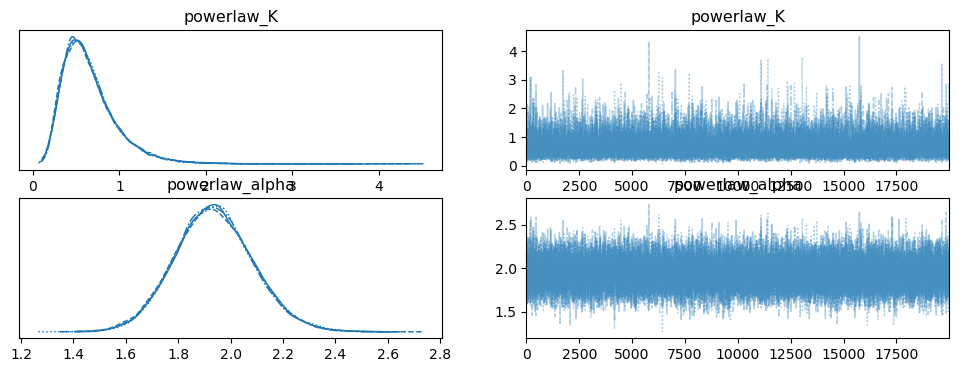

In [6]:
az.plot_trace(f._nuts_idata)